# generate the 2D grid plot for fine tune result

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

In [10]:
fmt = '.3f'
cmap = 'tab20b'
# cmap = 'jet'
v_min = 0
v_max = 5


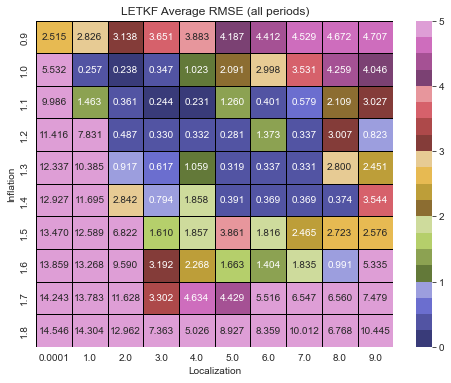

In [11]:
# LETKF grid
data = pd.read_csv('rmse_LETKF.csv')

c1 = [0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8]
c2 = [0.0001, 1, 2, 3, 4, 5, 6, 7, 8, 9]

data_2d = np.zeros((len(c1), len(c2)))
for i, c1_v in enumerate(c1):
    for j, c2_v in enumerate(c2):
        value = data[(data['inflation'] == c1_v) & (data['r_loc'] == c2_v)]['rmse_mean'].item()
        data_2d[i,j] = value

data_2d = pd.DataFrame(data_2d, index=c1, columns=c2)

plt.figure(figsize=(8,6))
ax = sns.heatmap(data_2d, annot=True, fmt=fmt, cmap=cmap,linewidths=1, linecolor='black',vmin=v_min, vmax=v_max)

ax.set_xlabel('Localization')
ax.set_ylabel('Inflation')
ax.set_title('LETKF Average RMSE (all periods)')
plt.savefig('LETKF_mean_rmse.png', dpi=200)
plt.show()

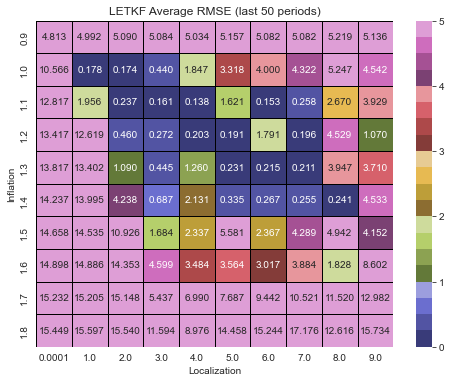

In [12]:
# LETKF grid
data = pd.read_csv('final_rmse_LETKF.csv')


data_2d = np.zeros((len(c1), len(c2)))
for i, c1_v in enumerate(c1):
    for j, c2_v in enumerate(c2):
        value = data[(data['inflation'] == c1_v) & (data['r_loc'] == c2_v)]['rmse_mean'].item()
        data_2d[i,j] = value

data_2d = pd.DataFrame(data_2d, index=c1, columns=c2)

plt.figure(figsize=(8,6))
ax = sns.heatmap(data_2d, annot=True, fmt=fmt, cmap=cmap,linewidths=1, linecolor='black',vmin=v_min, vmax=v_max)

ax.set_xlabel('Localization')
ax.set_ylabel('Inflation')
ax.set_title('LETKF Average RMSE (last 50 periods)')
plt.savefig('LETKF_final_rmse.png', dpi=200)
plt.show()